# Box plot

# Document

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">Box plot</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2019-05-09</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2017-09-12</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">box_plot.ipynb</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">data.csv</td>
    </tr>
</table>

# In brevi
A box plot is also called a box-and-whisker plot. It displays the distribution of a data set using a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It can also show the average.

![[Box plot (T. Kirkman)](http://www.physics.csbsju.edu/stats/box2.html)](images/box_plot.gif)

The whiskers extend to the last value before $Q3 + 1.5 * (Q3 - Q1)$ or $Q3 - 1.5 * (Q3 - Q1)$. Outliers are values beyond the whiskers.

In [1]:
# Start of time estimation for the notebook.
from datetime import datetime
start_time = datetime.now()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm


%matplotlib inline
%config InlineBacken.figure_format = 'svg'

In [3]:
c = cm.Paired.colors
# c[0] c[1] ... c[11]
# See "paired" in "qualitative colormaps"
# https://matplotlib.org/tutorials/colors/colormaps.html

# Example one
This is a simple box plot. There is no X variable, only a Y.

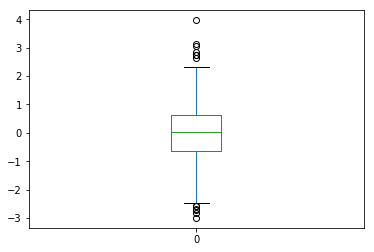

In [4]:
mu, sigma, n = 0, 1, 1000
df = pd.DataFrame(np.random.normal(mu, sigma, n))
ax = df.plot.box()

# Example two

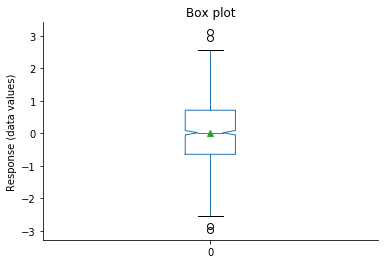

In [5]:
mu, sigma, n = 0, 1, 1000
df = pd.DataFrame(np.random.normal(mu, sigma, n))
colour_props = dict(boxes=c[0], whiskers=c[1],
                    medians=c[2], caps=c[3])
ax = df.plot.box(notch=True, showmeans=True)
ax.set_ylabel('Response (data values)')
ax.set_title('Box plot')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')

# Example three
The X axis is a variable with many items, called "City". The data for each plot plot is across rows for several columns; these are various scores to be summarized by a box plot.

In [6]:
df = pd.read_csv('data.csv')

In [7]:
# Clean up the messed up spacing
df['City'] = df['City'].str.split().str.join(' ')
df = df.set_index('City')

In [8]:
# Define chart labels
chart_title = 'Box Plot'
chart_subtitle = 'Balanced Scorecard by Location'
chart_ylabel = 'Score (Index)'
chart_xlabel = 'Location'

In [9]:
# T is transpose index and columns
df.T.head()

City,"PORT HALLOWELL, PICTON","SAGINAW, MI",FISHER HARBOUR,TORONTO,THUNDER BAY (VALLEY CAMP),HAMILTON,CANADIAN PARRY SOUND,PARRY SOUND (FOWLER),BOWMANVILLE,PORT COLBORNE,...,NEWINGTON NH,SOUTH PORTLAND ME,"PROVIDENCE, RI (SHIPYARD)","PROVIDENCE, RI (SPRAGUE)",PORTSMOUTH NH,PORT NEWARK NJ,WILMINGTON DE,CHARLESTON SC,SEARSPORT ME,"JACKSONVILLE, FL"
Cost,1.00,1.25,0.25,1.00,0.50,0.25,0.25,1.25,1.00,0.75,...,1.00,1.00,0.25,0.25,1.25,1.00,0.25,0.50,1.25,0.25
Environmental,0.75,0.75,1.00,0.75,0.75,0.75,0.75,1.00,1.00,1.00,...,1.00,1.00,0.75,1.00,1.00,0.50,1.00,1.00,1.00,1.00
Performance,0.60,0.60,0.60,0.60,0.45,0.30,0.60,0.60,0.60,0.75,...,0.45,0.45,0.60,0.45,0.45,0.60,0.45,0.75,0.45,0.45
Responsiveness,0.40,0.40,0.40,0.40,0.40,0.20,0.50,0.50,0.50,0.50,...,0.40,0.30,0.50,0.30,0.30,0.40,0.30,0.40,0.30,0.30
Contractual,0.30,0.30,0.75,0.60,0.75,0.45,0.30,0.45,0.75,0.45,...,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45


(-3.425, 88.425, 0.04250000000000001, 1.3075)

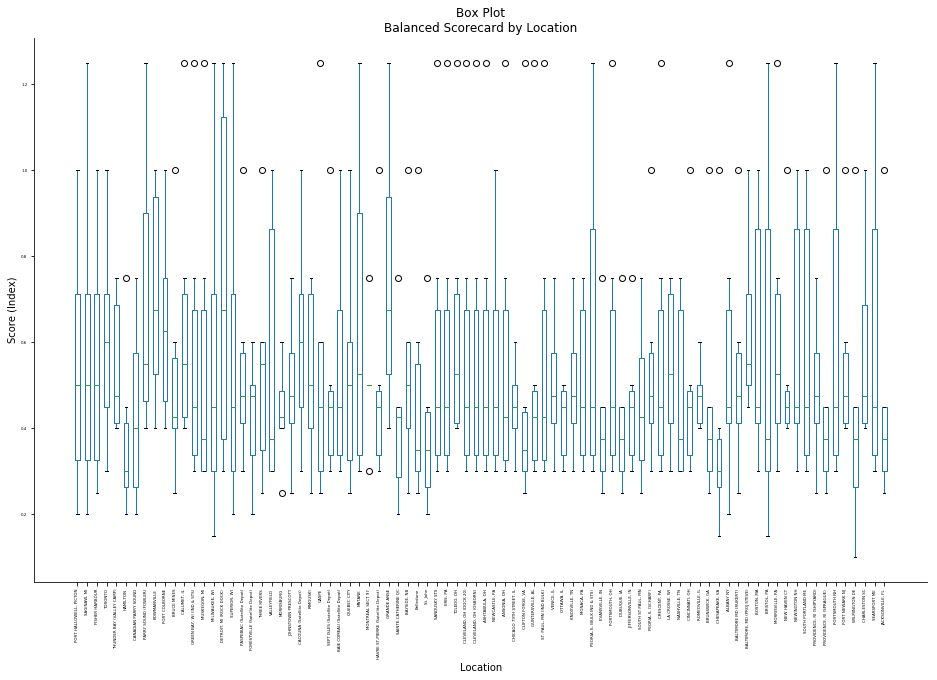

In [10]:
# T is transpose index and columns
#ax = df.T.plot.box(notch=True, showmeans=True)
ax = df.T.plot.box(figsize=(16, 10), rot=90, fontsize=4)
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
ax.set_title(chart_title + '\n' + chart_subtitle)
ax.set_ylabel(chart_ylabel)
ax.set_xlabel(chart_xlabel)
ax.axis('auto')

In [11]:
ax.figure.savefig('box_plot.svg', format='svg')
ax.figure.savefig('box_plot.pdf', format='pdf')

# Future work

I have found several good tutorials and references for matplotlib's artist and will add code here to enhance the box plots.

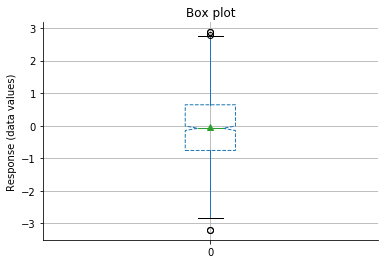

In [12]:
mu, sigma, n = 0, 1, 1000
df = pd.DataFrame(np.random.normal(mu, sigma, n))
boxprops = dict(linestyle='--', linewidth=1, color=c[5])
colour_props = dict(boxes=c[0], whiskers=c[1], medians=c[2], caps=c[3])
ax = df.boxplot(notch=True, showmeans=True, boxprops=boxprops)
ax.set_ylabel('Response (data values)')
ax.set_title('Box plot')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')

In [13]:
end_time = datetime.now()
(end_time - start_time).total_seconds()

3.974758

# References
Wikipedia. 2017. "Box plot." 2017-08-18. [https://en.wikipedia.org/wiki/Box_plot](https://en.wikipedia.org/wiki/Box_plot).